#  I- Préparation de données

## 0-Téléchargement de données.

In [2]:
from sklearn.datasets import fetch_openml
from numpy import unique
mnist = fetch_openml('mnist_784', version=1)

#15
#y_train_5 = (y_train == 5)
#y_test_5 = (y_test == 5)



## 1- Informations sur les données 

In [3]:
print(mnist.keys())
X=mnist.data
print(X.shape,"est la taille de nos donnée")

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])
(70000, 784) est la taille de nos donnée


In [4]:
y=mnist.target
print(y.shape,"est la taille de notre classe")

(70000,) est la taille de notre classe


In [5]:
print(unique(mnist.data))

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [6]:
print(mnist.DESCR)


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

5
<class 'str'>
<class 'numpy.uint8'>


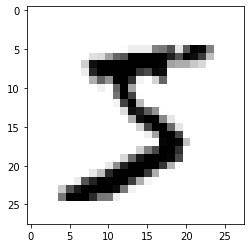

In [7]:
#print(mnist.data[0])
i1 = X[0].reshape(28,28)
#print(i1)
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(i1,cmap=mpl.cm.binary)
print(y[0])
print(type(y[0]))
y = y.astype(np.uint8)
print(type(y[0]))

Le label correspond donc bien à l'image afficher, un 5

## 2- Répartition des données

In [8]:
Xtest = X[0:60000]
Xappre = X[60000:]
ytest= y[0:60000]
yappre = y[60000:]


J'ai inverser les 2 la premiére fois que j'ai fais le tp, or quand je me suis appreçu de l'erreur il était trop tard pour tous modifié

# II- Apprentissage d'un classifieur binaire


## 1- Apprentissage des données

In [9]:
ytest5 = (ytest == 5)
yappre5 = (yappre == 5)
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(Xtest,ytest5)
print(sgd)
predict = sgd.predict(Xtest)
print(predict)
print(sgd.predict(Xtest[0].reshape(1, -1)))

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
[ True False False ...  True  True False]
[ True]


In [10]:
print(ytest5)

[ True False False ...  True False False]


## 2-1- Taux de classification 

In [11]:
from sklearn.model_selection import cross_val_score
#valeur = cross_val_score(sgd,Xtest,ytest5,scoring="accuracy",cv=3)
#print(valeur)

from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  

  def fit(self,X,y):
    pass
  def predict(self,X):
    return np.zeros(X.shape,dtype=bool)



never_5_clf = Never5Classifier()
#valeur2 = cross_val_score(never_5_clf,X,y,scoring="accuracy",cv=3)
#print(valeur2)

## 2-2- Matrice de confusion 

In [12]:
from sklearn.model_selection import cross_val_predict
valeur = cross_val_predict(sgd,Xtest,ytest5,cv=3)
print(valeur)


from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest5,valeur)
print(mat)

[ True False False ...  True False False]
[[53126  1453]
 [ 1247  4174]]


En haut à gauche sont les bonnes valeurs True, en haut à droite son les mauvaise prédictions positive alors qu'elle étais négative
En bas à gauche sont les mauvaise prédictions Fausse, elles ont étais prédites Vrai alors qu'elles sont fausse.
Et en bas a droite sont les bonnes fausse valeurs.

## 2-3- Précision et rappel

In [13]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision = precision_score(ytest5,predict)
print(precision)


0.5237752901304303


La précision la plus élevé étant 1, le score de notre prédition n'est pas parfaite, mais reste fiable

In [14]:
recal = recall_score(ytest5,predict)
print(recal)

0.9407858328721638


Le score du recall lui est plutot faible. 0.68 est beaucoup trop faible pour conclure que notre fonction de prédiction arrive a bien prédire les positive.

In [15]:
f1 = f1_score(ytest5,predict)
print(f1)

0.6729119936667107


La valeur du recall plombe le resultat final, même si la précision reste bonne celle du recall est beaucoup trop faible

In [16]:
valeur = cross_val_predict(sgd,Xtest,ytest5,cv=3,method="decision_function")
print(valeur)

[  3371.81747362 -18288.44566072 -29476.69215576 ...   8014.15296493
  -8459.67582871 -16168.00266029]


In [17]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
prec, recall, _ = precision_recall_curve(ytest5,valeur)
print(prec)

[0.09045704 0.09044186 0.09044337 ... 1.         1.         1.        ]


In [18]:
print(recall)

[1.00000000e+00 9.99815532e-01 9.99815532e-01 ... 3.68935621e-04
 1.84467810e-04 0.00000000e+00]


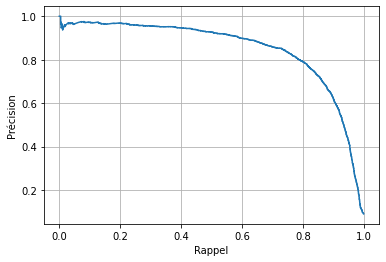

In [19]:
plt.plot(recall,prec)
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.grid(True)

## 2-3- Courbe ROC

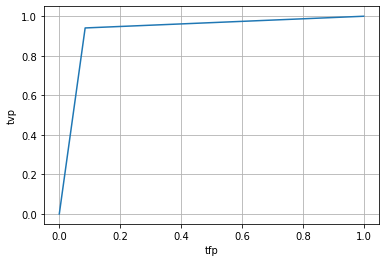

In [20]:
from sklearn.metrics import roc_curve
tfp,tvp,thresholds = roc_curve(ytest5,predict)
plt.plot(tfp,tvp)
plt.xlabel("tfp")
plt.ylabel("tvp")
plt.grid(True)

In [21]:
from sklearn.metrics import roc_auc_score
val = roc_auc_score(ytest5,predict)
print(val, "est la valeur de l'AUC du modèle d'apprentissage")

0.9279132081233608 est la valeur de l'AUC du modèle d'apprentissage


# III- Apprentissage d'un classifieur multi-classes



## 1- Apprentissage des données

In [22]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(Xtest,ytest)
print(sgd.predict(Xtest[0].reshape(1, -1)))


[5]


## 2- Evaluation du modèle d'apprentissage sur les données   d'apprentissage


### 2-1- Taux de classification 

In [34]:
from sklearn.model_selection import cross_val_score
valeur = cross_val_score(sgd,Xtest,ytest,scoring="accuracy",cv=3)
print(valeur)
print((valeur[0]+valeur[1]+valeur[2])/3)

[0.8539 0.8663 0.8765]
0.8655666666666666


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrainnorm = scaler.fit_transform(Xtest)

valeur = cross_val_score(sgd,Xtrainnorm,ytest,scoring="accuracy",cv=3)
print(valeur)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[0.9014  0.9015  0.89825]


Les résultats sont effectivement meilleur.

### 2-2- Matrice de confusion 

[5 0 4 ... 5 6 8]
[[5462    0  106   22   22   75   85   20   74   57]
 [   2 6447   48   33   10   39   17   40   77   29]
 [  65   81 5119  127   64   45  164  107  152   34]
 [  39   27  207 5202   16  203   39  100  125  173]
 [  21   19   38   12 5286   15   69   34   33  315]
 [  88   15   54  282   90 4324  186   32  224  126]
 [  30   22   68   18   60  152 5506    3   52    7]
 [  27   25   55   21   92    9    5 5714   31  286]
 [  58  131  131  233   92  345   77   48 4413  323]
 [  28   21   41   71  286   34    4  314   45 5105]]
6742
[[92  0  1  0  0  1  1  0  1  0]
 [ 0 95  0  0  0  0  0  0  1  0]
 [ 1  1 85  2  1  0  2  1  2  0]
 [ 0  0  3 84  0  3  0  1  2  2]
 [ 0  0  0  0 90  0  1  0  0  5]
 [ 1  0  0  5  1 79  3  0  4  2]
 [ 0  0  1  0  1  2 93  0  0  0]
 [ 0  0  0  0  1  0  0 91  0  4]
 [ 0  2  2  3  1  5  1  0 75  5]
 [ 0  0  0  1  4  0  0  5  0 85]]


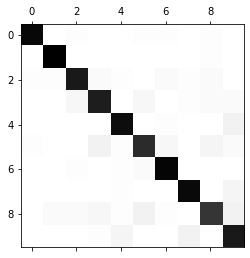

In [ ]:

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

from sklearn.model_selection import cross_val_predict
#predict = cross_val_predict(sgd,Xtest,ytest,cv=3)
print(predict)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest,predict)
print(mat)
print(sum(mat[1]))
for i in range(10):
  somme = sum(mat[i])
  for y in range(10):
    #print(mat[i][y],somme,(mat[i][y])/somme)
    mat[i][y] = ((mat[i][y])/somme)*100

print(mat)
from matplotlib.pyplot import matshow
matshow(mat,cmap=mpl.cm.binary)

Le 5 est sans doute le chiffre le plus dur a prédire étant donner qu'il resemble a plusieurs chiffres

[[0 0 1 0 0 1 1 0 1 0]
 [0 0 0 0 0 0 0 0 1 0]
 [1 1 0 2 1 0 2 1 2 0]
 [0 0 3 0 0 3 0 1 2 2]
 [0 0 0 0 0 0 1 0 0 5]
 [1 0 0 5 1 0 3 0 4 2]
 [0 0 1 0 1 2 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 4]
 [0 2 2 3 1 5 1 0 0 5]
 [0 0 0 1 4 0 0 5 0 0]]


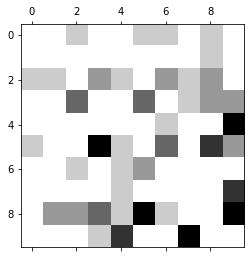

In [ ]:
np.fill_diagonal(mat,0)
print(mat)
from matplotlib.pyplot import matshow
matshow(mat,cmap=mpl.cm.binary)

le 8 n'a pas beaucoup d'erreur, car il est facilement différentiable des autres chiffres
Il existe une forte confusion entre 3 et 5, car lors de l'ecriture de ces chiffres. Une grandes zones coloriée ce retrouve étre au même endroit pour les 2

# IV- Classification multi-label

In [ ]:
ytesttrue7 = (ytest > 7)
yappretrue7 = (yappre > 7)
ytesttrueimp = [False]*len(ytest)
for i in range(len(ytest)):
  if (ytest[i] % 2) != 0:
    ytesttrueimp[i] = True
yappretrueimp = [False]*len(yappre)
for i in range(len(yappre)):
  if (yappre[i] % 2) != 0:
    yappretrueimp[i] = True   
yappremulti = np.c_[yappretrue7,yappretrueimp]
ytestmulti = np.c_[ytesttrue7,ytesttrueimp]
print(yappremulti.shape)
print(ytestmulti.shape)

(10000, 2)
(60000, 2)


Nos 2 vecteurs sont de bonne taille

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(Xappre,yappremulti)
ypreneigh = neigh.predict(Xtest)
print(ytestmulti[0])
print(ypreneigh[0])

[False  True]
[False  True]


La prédiction est corecte sur la premiére valeur de test

In [ ]:
from sklearn.model_selection import cross_val_score
valeur = cross_val_score(neigh,yappre.reshape(-1, 1),yappremulti,scoring="accuracy",cv=3)
print(valeur)
from sklearn.metrics import precision_score,recall_score,f1_score
precision = precision_score(ytestmulti,ypreneigh,average='macro')
print(precision)
recal = recall_score(ytestmulti,ypreneigh,average='macro')
print(recal)

[1. 1. 1.]
1.0
1.0


A priori notre prediction parait étre parfaite

# V- Classification multi-output

In [ ]:
noise_train = np.random.randint(0, 100, (len(Xappre), 784))
Xapprenoise = Xappre + noise_train
noise_train = np.random.randint(0, 100, (len(Xtest), 784))
Xtestnoise = Xtest + noise_train
ytestmult= Xtest
yappremult = Xappre
print(Xtestnoise.shape)
print(yappremult.shape)

(60000, 784)
(10000, 784)


7


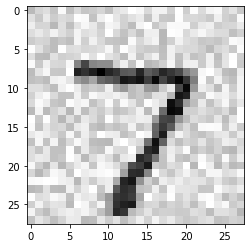

In [ ]:
i1 = Xapprenoise[0].reshape(28,28)
i2 = yappremult[0].reshape(28,28)
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.imshow(i1,cmap=mpl.cm.binary)
print(yappre[0])


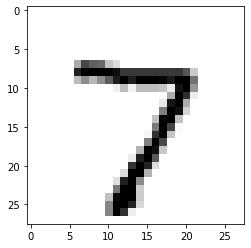

In [ ]:
plt.imshow(i2,cmap=mpl.cm.binary)

In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(Xtestnoise,ytestmult)
ypreneigh = neigh.predict(Xappre)

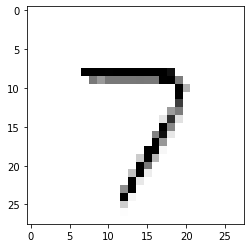

In [ ]:
i3 = ypreneigh[0].reshape(28,28)
plt.imshow(i3,cmap=mpl.cm.binary)

L'image afficher représente bien notre 7, mais celui ci a perdu en détail, cette méthode a grandement simplifier notre 